<a href="https://colab.research.google.com/github/chunbo777/dacon_prac/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!git clone https://github.com/chunbo777/deep-learning-from-scratch

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 826, done.
remote: Total 826 (delta 0), reused 0 (delta 0), pack-reused 826
Receiving objects: 100% (826/826), 52.21 MiB | 37.62 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [3]:
!git clone https://github.com/chunbo777/deep-learning-from-scratch-2

Cloning into 'deep-learning-from-scratch-2'...
remote: Enumerating objects: 606, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 606 (delta 1), reused 5 (delta 0), pack-reused 598
Receiving objects: 100% (606/606), 29.82 MiB | 34.19 MiB/s, done.
Resolving deltas: 100% (361/361), done.


In [4]:
import numpy as np

In [5]:
def preprocess(text):
    """
        전처리 함수
        text =  "you say goodebye and I say hello 
        return corpus : id로만 이루어진 word 배열
        word to id, id to word : 단어와 일련번호 사전
    """
    # text = text.replace(",", "")
    
    text_split = text.split(" ")
    word_to_idx = {}
    idx_to_word = {}
    for t in text_split:
        if t not in word_to_idx.keys():
            word_idx = len(word_to_idx)
            word_to_idx[t] = word_idx
            idx_to_word[word_idx] = t

    corpus = [word_to_idx[t] for t in text_split]
    # corpus = text_split
    return corpus, word_to_idx, idx_to_word


def create_co_matrix(corpus,  window_size = 2):
 
    """윈도 사이즈 내에 있는 단어들을 동시 발생 행렬로 배열하는 함수"""
    
    corid, word_to_idx, idx_to_word = preprocess(corpus)
    corpus = corpus.split(" ")
    co_matrix = np.zeros((len(corid), len(corid)))
    for i, word in enumerate(corid):
        for j in range(1, window_size+1):
            right_idx = i+j
            left_idx = i-j 
            if right_idx < len(corpus):
                co_matrix[word, corid[right_idx]] += 1
            if left_idx >= 0:
                co_matrix[word, corid[left_idx]] += 1
            
    return co_matrix


# t = preprocess(text)
# m = create_co_matrix(text)

def cos_similarity (x, y, eps = 1e-8):
    """x와 y간의 코사인 유사도 구하기"""
    nx = x/(np.sqrt(np.sum(x**2))+eps)
    ny = y/(np.sqrt(np.sum(y**2))+eps)
    return np.dot(nx,ny)
# print(t, m)



def most_similarity(query, word_to_id, id_to_word, word_matrix, top = 5):
    if query not in word_to_id:
        return
    else:
        query_id = word_to_id[query]
        query_vec = word_matrix[query_id]

        vocab_size = len(id_to_word)
        similarity = np.zeros(vocab_size)
        for i  in range(vocab_size):
            similarity[i] = cos_similarity(word_matrix[i], query_vec)

        count = 0
        for i in (-1 * similarity).argsort():
            if id_to_word[i] == query:
                continue
            print( " %s: %s" %(id_to_word[i], similarity[i]))

            count += 1
            if count >= top:
                return

text = "you say goodebye and I say hello"
corpus, word_to_id, id_to_word = preprocess(text)
C = create_co_matrix(text)

most_similarity("say", word_to_id,id_to_word, C)


 goodebye: 0.7071067751510136
 I: 0.7071067751510136
 and: 0.2886751323956809
 you: 0.24999999734834955
 hello: 0.24999999734834955


In [6]:
def ppmi(C, verbose = False, eps = 1e-8):
    M = np.zeros_like(C, dtype = np.float32)
    N = np.sum(C)
    S = np.sum(C, axis = 0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / S[i]*S[j] + eps)
            M[i,j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt %(total//100+1) == 0:
                    print("%.1f%% 완료" % (100*cnt/total))
    return M

In [7]:
W = ppmi(C)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [8]:
W

array([[0.       , 6.044394 , 5.4594316, 0.       , 0.       , 0.       ,
        0.       ],
       [2.874469 , 0.       , 3.874469 , 4.8744693, 3.874469 , 2.874469 ,
        0.       ],
       [3.4594316, 5.044394 , 0.       , 4.4594316, 4.4594316, 0.       ,
        0.       ],
       [0.       , 6.044394 , 4.4594316, 0.       , 4.4594316, 0.       ,
        0.       ],
       [0.       , 5.044394 , 4.4594316, 4.4594316, 0.       , 3.4594316,
        0.       ],
       [0.       , 6.044394 , 0.       , 0.       , 5.4594316, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       ]], dtype=float32)

In [9]:
import sys
sys.path.insert(0, "/content/deep-learning-from-scratch-2" )
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi



In [10]:
U, S, V = np.linalg.svd(W)

In [11]:
V.shape


(7, 7)

In [12]:
text = "you say goodebye and I say hello"
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size =1)
W = ppmi(W)
U, S, V = np.linalg.svd(W)

/content/deep-learning-from-scratch-2/common/util.py:141: RuntimeWarning: invalid value encountered in float_scalars
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)


In [13]:
!pip install pprint

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint


In [14]:
print(C[0], W[0], U[0])

[0 1 0 0 0 0] [0.        1.6245388 2.1063955 0.        0.        0.        0.       ] [-0.6676697  -0.68576676 -0.06119522 -0.17240636  0.21300137  0.07143316
  0.        ]


In [15]:
U[2,0]

-0.061972603

In [16]:
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


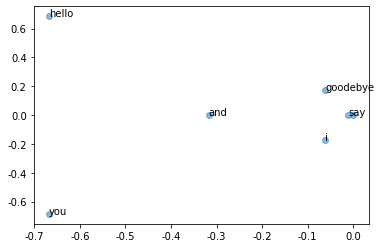

In [17]:




for word, word_id in word_to_id.items():
    try:
        plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    except:
        pass
plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()